# Apriori Algorithm in Online Electronics Retail

In [1]:
!pip install mlxtend --quiet

In [13]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
# Step 1: Create Synthetic Electronics Transactions
transactions = [
    ['Laptop', 'Mouse', 'Keyboard'],
    ['Smartphone', 'Earphones'],
    ['Laptop', 'Mouse'],
    ['Smartphone', 'Charger'],
    ['Laptop', 'Keyboard', 'Mouse'],
    ['Earphones', 'Smartphone'],
    ['Laptop', 'Mouse', 'USB Cable'],
    ['Smartwatch', 'Smartphone'],
    ['Keyboard', 'Mouse'],
    ['Laptop', 'Smartphone', 'Charger']
]

In [16]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

In [17]:
print("Sample Data:")
df.head()

Sample Data:


,Charger,Earphones,Keyboard,Laptop,Mouse,Smartphone,Smartwatch,USB Cable
0,False,False,True,True,True,False,False,False
1,False,True,False,False,False,True,False,False
2,False,False,False,True,True,False,False,False
3,True,False,False,False,False,True,False,False
4,False,False,True,True,True,False,False,False


In [18]:
# Step 2: Apply Apriori Algorithm
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("\nFrequent Itemsets:")
frequent_itemsets


Frequent Itemsets:


,support,itemsets
0,0.3,(Keyboard)
1,0.5,(Laptop)
2,0.5,(Mouse)
3,0.5,(Smartphone)
4,0.3,"(Mouse, Keyboard)"
5,0.4,"(Mouse, Laptop)"


In [19]:
# Step 3: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules[['antecedents','consequents','support','confidence','lift']]


Association Rules:


,antecedents,consequents,support,confidence,lift
0,(Mouse),(Keyboard),0.3,0.6,2.0
1,(Keyboard),(Mouse),0.3,1.0,2.0
2,(Mouse),(Laptop),0.4,0.8,1.6
3,(Laptop),(Mouse),0.4,0.8,1.6


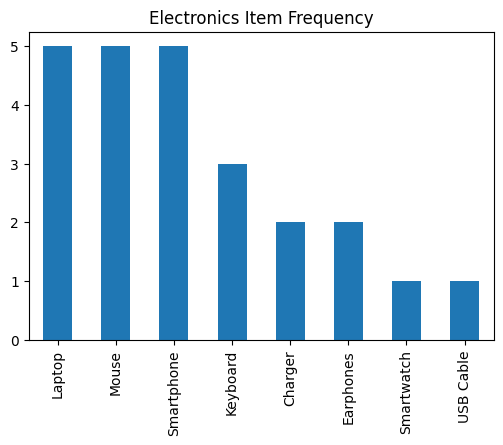

In [20]:
# Step 4: Visualization
item_counts = df.sum().sort_values(ascending=False)
item_counts.plot(kind='bar', figsize=(6,4), title='Electronics Item Frequency')
plt.show()

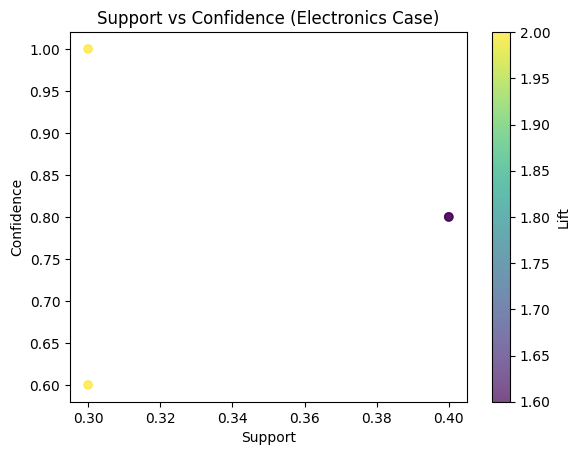

In [21]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Electronics Case)')
plt.colorbar(label='Lift')
plt.show()

In [22]:
# Step 5: Business Interpretation
# Example: Customers who buy Laptop often buy Mouse & Keyboard together -> bundle offer suggestion.

rules.to_csv("Electronics_Association_Rules.csv", index=False)
print("\nRules exported to Electronics_Association_Rules.csv")



Rules exported to Electronics_Association_Rules.csv
